# Coronavirus Tweet Sentiment Analysis

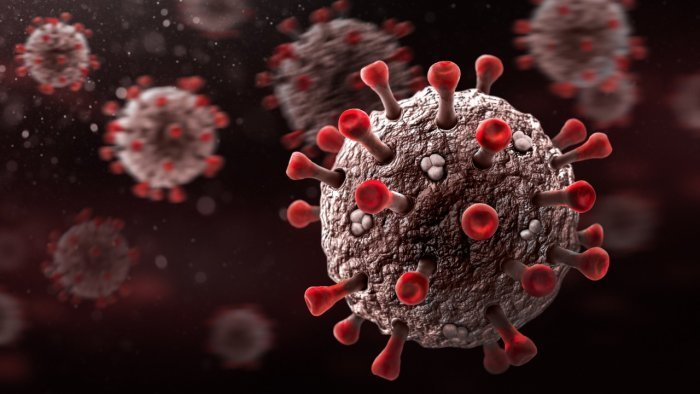

In year 2020 the covid-19 caused by SARS-CoV-2 caused pandameic suddenly came out of no where and surged throughout the globe and affected everyday life. Starting with Wuhan and being a highly contagious new disease, the goverments across the globe followed the lockdown procedures by imposing travel related curbs and shutting all the economic activities which required travelling and gathering.
According to the International Telecommunication Union (ITU), during the COVID-19 pandemic, Internet user ranks grew to 4.9 billion in 2021, from 4.1 billion in 2019. Remote education, remote work and remote health services came within the reach of many.
Social media platforms largely became one of the methods for expression and connecting. They saw a huge surge in usage and as per a report, Twitter saw 24% surge(from 152 million to 166 million) in usage during the lockdown (**source:-bloomberg news**).
Twitter took the internet by storm by becoming a key platform for some of the world's top experts to contribute to real-time knowledge-sharing and provide input on policymaking.
Twitter became a method of expression for people by expressing their feelings regarding the vaccinations' safety and effectivenes. The proposed approach analyzes collected tweets' sentiments for sentiment classification using various feature sets and classifiers. The early detection of COVID-19 sentiments from collected tweets allow for a better understanding and handling of the pandemic. In our dataset we have tweets which are categorized into positive, negative, and neutral sentiment classes. We evaluate the performance of machine learning (ML) classifiers using evaluation metrics (i.e., accuracy, precision, recall, and F1-score). Our dataset contains following feature:-

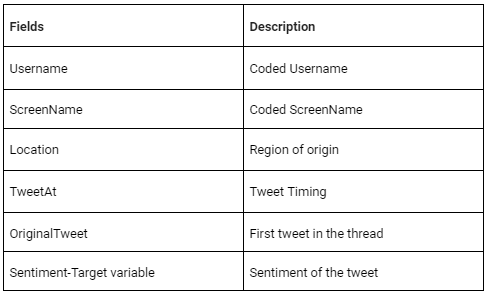

## **Loading Dataset and Importing Modules**

In [ ]:

# essential entity models downloads
import nltk
nltk.download('all',quiet=True)
nltk.downloader.download('maxent_ne_chunker')
nltk.downloader.download('words')
nltk.downloader.download('treebank')
nltk.downloader.download('maxent_treebank_pos_tagger')
nltk.downloader.download('punkt')
nltk.download('averaged_perceptron_tagger')

import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
from wordcloud import WordCloud

from PIL import Image
from wordcloud import WordCloud, STOPWORDS

#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
import warnings
from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))

warnings.filterwarnings('ignore')
sns.set_palette(palette=sns.color_palette("husl", 10), n_colors=None, desat=None, color_codes=False)
sns.set_style("darkgrid", {"grid.color": ".6", "grid.linestyle": ":"})

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
from datetime import datetime as dt

## **Mount the drive and import the datset**

In [ ]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project/Shashank_ML/classification_coronavirus tweet sentiment/Coronavirus Tweets.csv', encoding = 'latin-1')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#copying data to preserve orignal file
df1=df.copy()

# Exploratory Data Analysis

## **Data Understanding**
We need to look the data first in order to process the data

In [ ]:
#checking the head of the data
df1.head(10)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive
7,3806,48758,Austria,16-03-2020,Was at the supermarket today. Didn't buy toile...,Neutral
8,3807,48759,"Atlanta, GA USA",16-03-2020,Due to COVID-19 our retail store and classroom...,Positive
9,3808,48760,"BHAVNAGAR,GUJRAT",16-03-2020,"For corona prevention,we should stop to buy th...",Negative


In [ ]:
#checking the tail of the data
df1.tail(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [ ]:
#Getting the shape of dataset with rows and columns
print(df1.shape)

(41157, 6)


In our dataset 6 columns and 41157 rows are present

In [ ]:
#Getting all the columns
print("Features of the dataset:")
df1.columns

Features of the dataset:


Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
#check details about the data set
#df.info() gives the summary of the dataframe including data types, shape and memory storage.
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [ ]:
#print the unique value
df2=df1.nunique().reset_index()

df2

,index,0
0,UserName,41157
1,ScreenName,41157
2,Location,12220
3,TweetAt,30
4,OriginalTweet,41157
5,Sentiment,5


(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'UserName'),
  Text(1, 0, 'ScreenName'),
  Text(2, 0, 'Location'),
  Text(3, 0, 'TweetAt'),
  Text(4, 0, 'OriginalTweet'),
  Text(5, 0, 'Sentiment')])

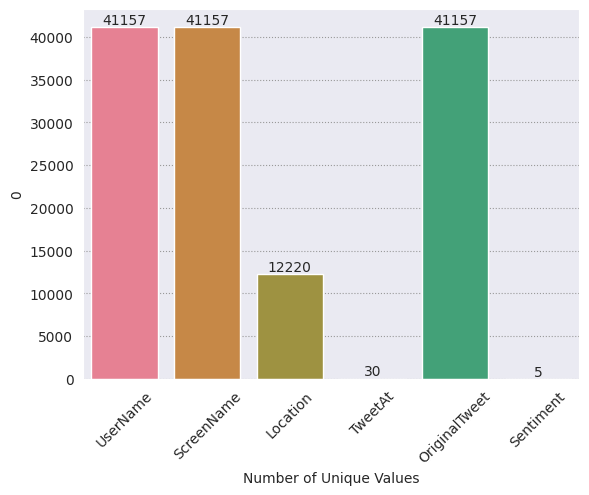

In [ ]:
ax=sns.barplot(df2,x='index',y=0)
plt.xlabel("Number of Unique Values")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)

In [ ]:
#Looking for the description of the dataset to get insights of the data
#to know more about the characteristics of the dataset We are using the df.describe() which by default gives statistical information of all numerical features in our data frame.
df1.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
UserName,41157.0,NaN,NaN,NaN,24377.0,11881.146851,3799.0,14088.0,24377.0,34666.0,44955.0
ScreenName,41157.0,NaN,NaN,NaN,69329.0,11881.146851,48751.0,59040.0,69329.0,79618.0,89907.0
Location,32567,12220,London,540,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TweetAt,41157,30,20-03-2020,3448,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OriginalTweet,41157,41157,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sentiment,41157,5,Positive,11422,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking duplicate values

In [ ]:
#Checking for duplicates
len(df1[df1.duplicated()])

0

No duplicates are there in our data set

## Tweet analysis

### Tweet by length

In [ ]:
df1['text_length'] = df1['OriginalTweet'].apply(len)

In [ ]:
tweet_character_length= df1['text_length'].sort_values(ascending=False)

In [ ]:
# Create a DataFrame `top_tweet_character_length` from `tweet_character_length
top_tweet_character_length=pd.DataFrame(tweet_character_length)
# Reset the index of `top_tweet_character_length` and assign the result back to `top_tweet_character_length`
top_tweet_character_length.reset_index(inplace=True)
# Rename the columns of `top_tweet_character_length` to 'Original_Tweet_Row' and 'tweet_character_Count'
top_tweet_character_length.rename(columns={'index':'Original_Tweet_Row', 'text_length':'tweet_character_Count'}, inplace=True)

In [ ]:
top_tweet_character_length

,Original_Tweet_Row,tweet_character_Count
0,25160,355
1,7483,350
2,29688,341
3,17811,340
4,27346,338
...,...,...
41152,15577,12
41153,16872,11
41154,35526,11
41155,20467,11


[Text(0, 0, '331'),
 Text(0, 0, '333'),
 Text(0, 0, '335'),
 Text(0, 0, '334'),
 Text(0, 0, '350'),
 Text(0, 0, '338'),
 Text(0, 0, '340'),
 Text(0, 0, '355'),
 Text(0, 0, '338'),
 Text(0, 0, '341')]

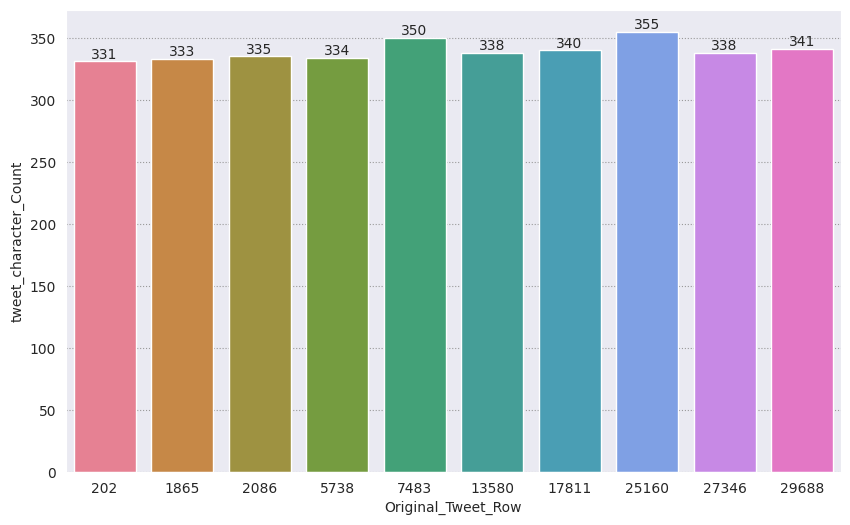

In [ ]:
# top 10 tweets with the longest character lengths, sort them in descending order, and assign them to `top_tweet_length`
top_tweet_len=top_tweet_character_length.head(10).sort_values(by='tweet_character_Count',ascending=False)
plt.figure(figsize=(10, 6))
# Create a bar plot using Seaborn, with 'Original_Tweet_Row' on the x-axis, 'tweet_character_Count' on the y-axis, and `top_tweet_length` as the data source
bar_plot = sns.barplot(x="Original_Tweet_Row", y="tweet_character_Count", data=top_tweet_len)
bar_plot.bar_label(bar_plot.containers[0])


To visualize this data, a bar chart is a good choice. A bar chart can effectively show the Original_Tweet_Row from each location in a clear and concise way. Each location can be represented by a bar, with the height of the bar indicating the tweet_character_Count.

Row Number 25160 has highest Tweet length of character i.e 350

In [ ]:
l=top_tweet_character_length['tweet_character_Count'].describe().reset_index()

[Text(0, 0, '41157'),
 Text(0, 0, '204.2'),
 Text(0, 0, '68.6551'),
 Text(0, 0, '11'),
 Text(0, 0, '151'),
 Text(0, 0, '215'),
 Text(0, 0, '259'),
 Text(0, 0, '355')]

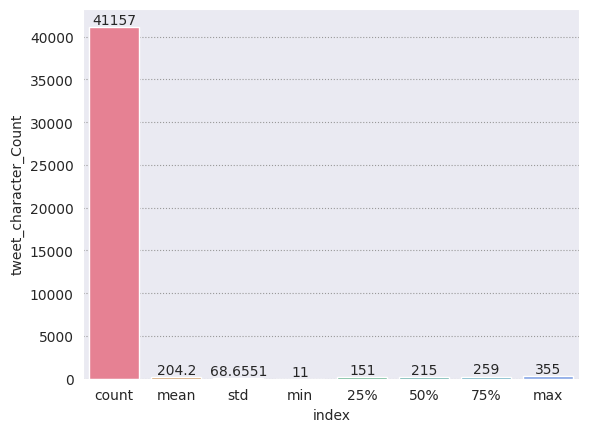

In [ ]:
g=sns.barplot(l,y='tweet_character_Count',x='index')
g.bar_label(g.containers[0])

While the average characters in tweet are 204.2, the maximum is 355  and minimum is 11 characters

### Tweet Time

<Axes: xlabel='TweetAt'>

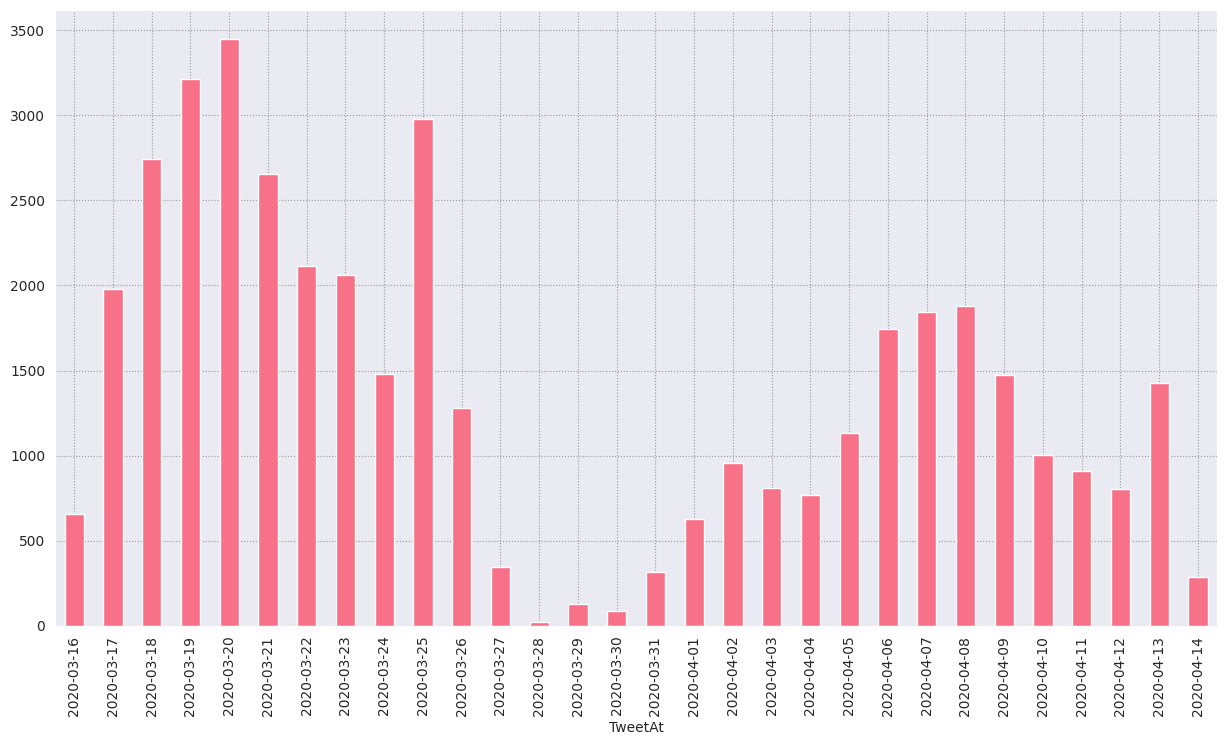

In [ ]:
df1['TweetAt'] = pd.to_datetime(df['TweetAt'], format='%d-%m-%Y')
df1['TweetAt'] = df1['TweetAt'].dt.strftime('%Y-%m-%d')
plt.figure(figsize=(15,8))
d=df1.groupby('TweetAt').count().sort_values(by='TweetAt')['OriginalTweet']
#d.sort_values(by='TweetAt')

d.plot(kind='bar')

Text(0.5, 1.0, 'Monthwise Tweet')

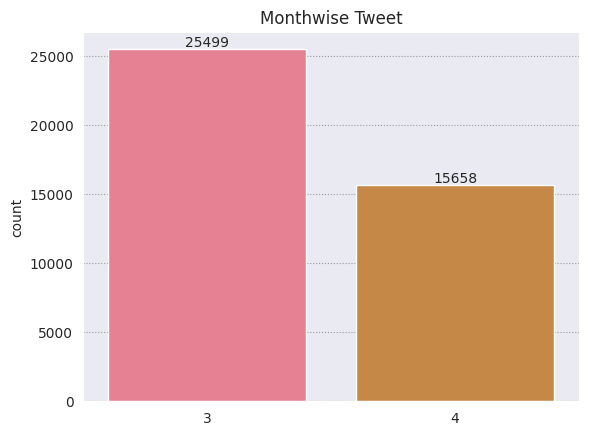

In [ ]:
date_objects = [dt.strptime(date_str, '%Y-%m-%d') for date_str in df1.TweetAt]
months = [date_obj.month for date_obj in date_objects]
ax= sns.countplot(x=months)
ax.bar_label(ax.containers[0])

plt.title('Monthwise Tweet')


Out of the two months data march has almost 60% of the total tweets

If we see day wise data them around third week the tweets were most followed by the second week of month as the lockdown followed up around third week of march and then dropped. This trend may be due to the financial year closing

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

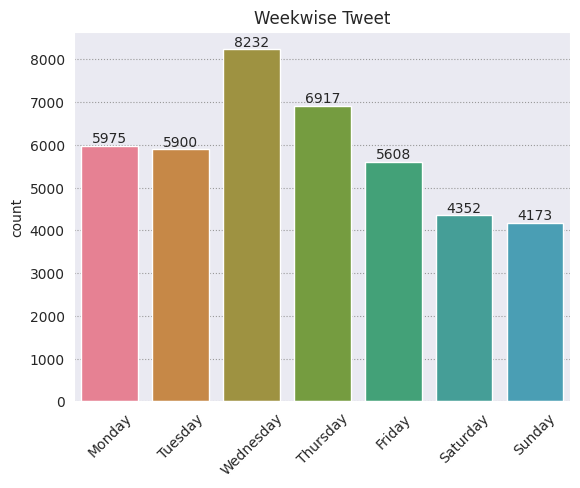

In [ ]:
date_objects = [dt.strptime(date_str, '%Y-%m-%d') for date_str in df1.TweetAt]

days_of_week = [date_obj.weekday() for date_obj in date_objects]

# Define a list of day names for mapping the weekday integers to day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Map the weekday integers to day names
day_names_of_week = [day_names[day] for day in days_of_week]
ax=sns.countplot(x=day_names_of_week)
ax.bar_label(ax.containers[0])
plt.title('Weekwise Tweet')
plt.xticks(rotation=45)




People tweeted more on weekdays than the weekends as people are more online for work on weekdays and they check the social media freequenty then

## Tweets by sentiments

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Neutral'),
  Text(1, 0, 'Positive'),
  Text(2, 0, 'Extremely Negative'),
  Text(3, 0, 'Negative'),
  Text(4, 0, 'Extremely Positive')])

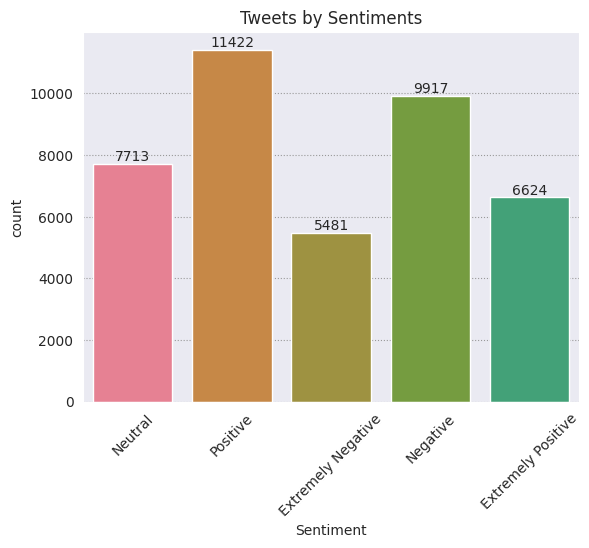

In [ ]:
ax=sns.countplot(x=df1.Sentiment)
ax.bar_label(ax.containers[0])
plt.title('Tweets by Sentiments')
plt.xticks(rotation=45)



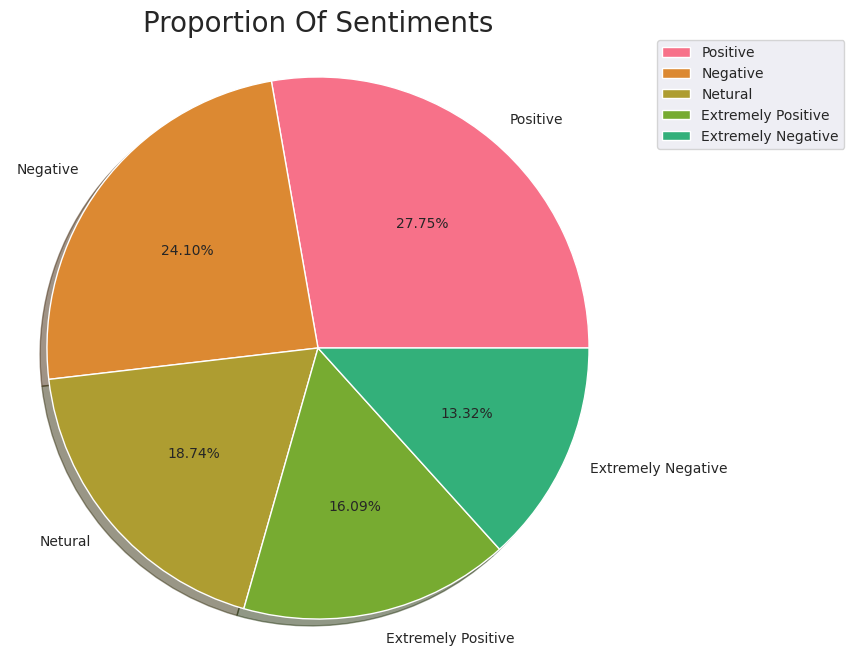

In [ ]:
# Plotting the piechart for Sentiments distribution
sentiment_count = df1['Sentiment'].value_counts()
labels=['Positive','Negative','Netural','Extremely Positive','Extremely Negative']
plt.figure(figsize=(10,8))
plt.pie(x= sentiment_count,shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

There were more people with extremely positive sentiments than the people who were extremely negative. Again people with positive sentiments are more than the people with negative sentiments

In [ ]:
lp=df1.copy()
lp.replace({'Extremely Positive':'Positive','Extremely Negative':'Negative'}, inplace=True)

In [ ]:
lp.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,text_length
0,3799,48751,London,2020-03-16,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,111
1,3800,48752,UK,2020-03-16,advice Talk to your neighbours family to excha...,Positive,237
2,3801,48753,Vagabonds,2020-03-16,Coronavirus Australia: Woolworths to give elde...,Positive,131
3,3802,48754,NaN,2020-03-16,My food stock is not the only one which is emp...,Positive,306
4,3803,48755,NaN,2020-03-16,"Me, ready to go at supermarket during the #COV...",Negative,310


[Text(0, 0, '7713'), Text(0, 0, '18046'), Text(0, 0, '15398')]

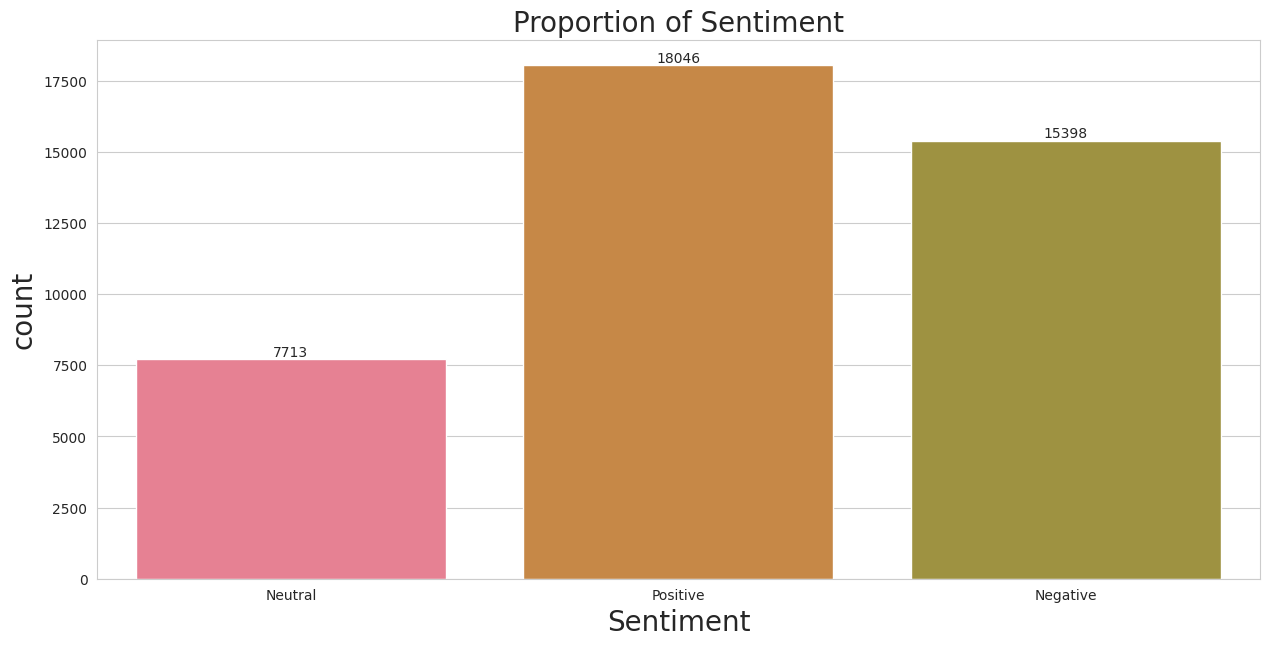

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(x="Sentiment", data=lp)
ax.set_title("Proportion of Sentiment", fontsize=20)
ax.set_xlabel("Sentiment", fontsize=20)
ax.set_ylabel('count', fontsize=20)
ax.bar_label(ax.containers[0])



**Number of "Positive" sentiments are higher than all other sentiments**
1. Positive has the highest percentage i.e 28%.
2. Negative has around 24%
3. Neutral has 19%.
4. Extremely positive has 16.2%.
5. Extremely negative has 13%.

In [ ]:
#Extracting top hashtags

def hashtag_extract(x):
    hashtags = []
    for i in x:
        ht = re.findall(r'#(\w+)', i)
        hashtags.append(ht)
    return hashtags

HT=hashtag_extract(df1['OriginalTweet'])

# unnesting list

Hashtags=sum(HT, [])

## Location

In [ ]:
loc=df1['Location'].value_counts().sort_values(ascending=False)[:10]
loc

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'London'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'London, England'),
  Text(3, 0, 'New York, NY'),
  Text(4, 0, 'Washington, DC'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'Los Angeles, CA'),
  Text(7, 0, 'India'),
  Text(8, 0, 'UK'),
  Text(9, 0, 'Australia')])

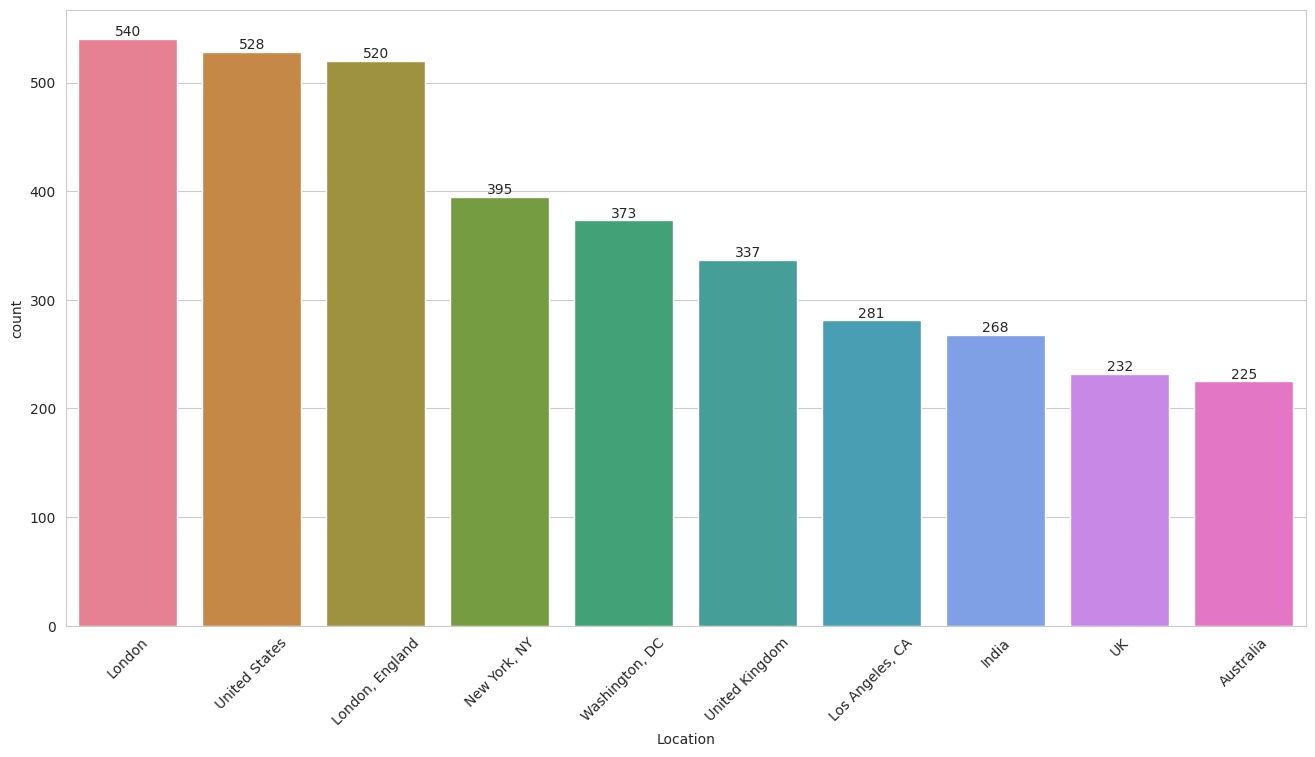

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
a=sns.countplot(x='Location',data=df1[df1['Location'].isin(loc.index)],order=loc.index)
for label in a.containers:
    a.bar_label(label)
plt.xticks(rotation=45)

The top 10 tweets show that london has highest but if we see the third highest then we will notice it again mentions but as london as hence there may be many places which may be nicknamed but have the same reference. It has also been observered that western countries tweeted more than other parts of world.

In [ ]:
dg=df1.copy()
dg.replace({'Extremely Positive':'Positive','Extremely Negative':'Negative'}, inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'London'),
  Text(1, 0, 'United States'),
  Text(2, 0, 'London, England'),
  Text(3, 0, 'New York, NY'),
  Text(4, 0, 'Washington, DC'),
  Text(5, 0, 'United Kingdom'),
  Text(6, 0, 'Los Angeles, CA'),
  Text(7, 0, 'India'),
  Text(8, 0, 'UK'),
  Text(9, 0, 'Australia')])

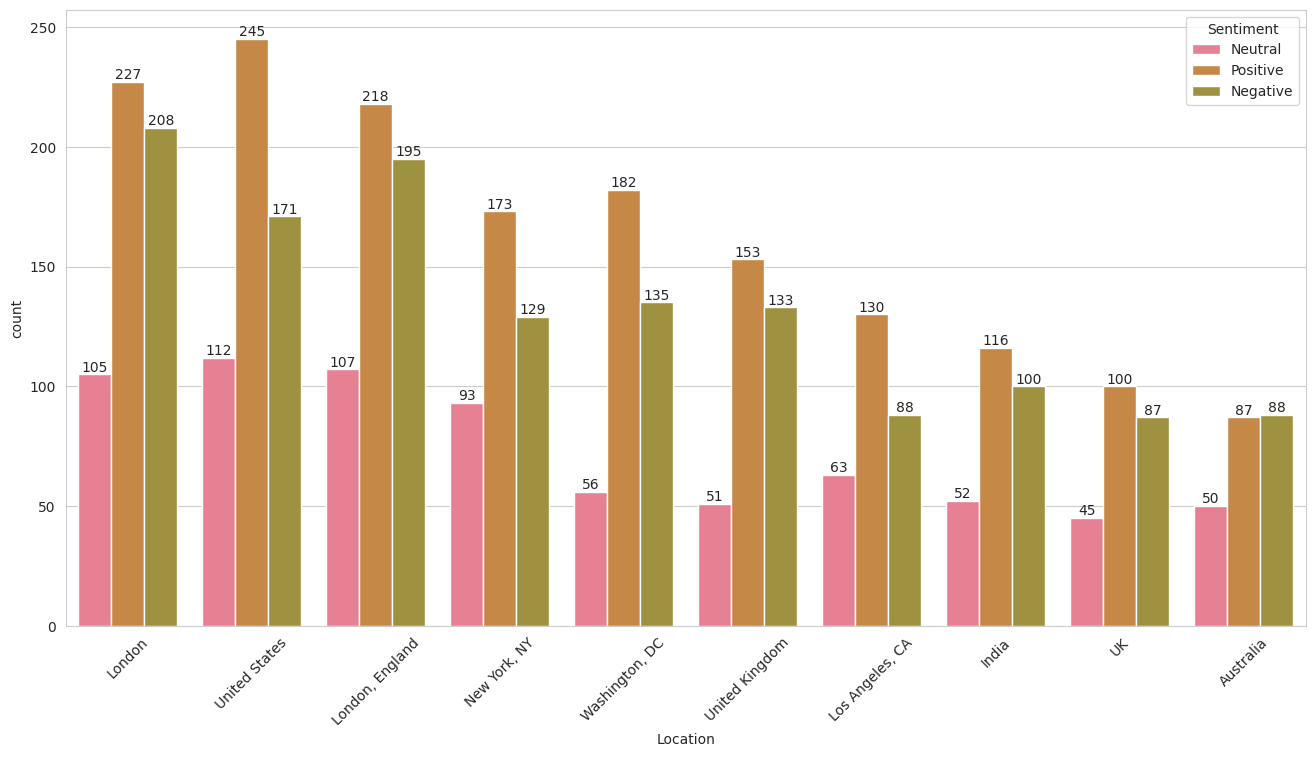

In [ ]:
plt.figure(figsize=(16,8))
sns.set_style("whitegrid")
a=sns.countplot(x='Location',data=dg[dg['Location'].isin(loc.index)],order=loc.index,hue='Sentiment')
for label in a.containers:
    a.bar_label(label)
plt.xticks(rotation=45)

Though the no. of neutral tweets are also significant, almost everywhere people wrote positive tweets more than the negative tweets, which indicates people were optimistic even during the pandamic

## Top trending Words and Hastags

In [ ]:
df1.OriginalTweet

0        @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1        advice Talk to your neighbours family to excha...
2        Coronavirus Australia: Woolworths to give elde...
3        My food stock is not the only one which is emp...
4        Me, ready to go at supermarket during the #COV...
                               ...                        
41152    Airline pilots offering to stock supermarket s...
41153    Response to complaint not provided citing COVI...
41154    You know itÂs getting tough when @KameronWild...
41155    Is it wrong that the smell of hand sanitizer i...
41156    @TartiiCat Well new/used Rift S are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

Text(0.5, 1.0, 'Top Hastags')

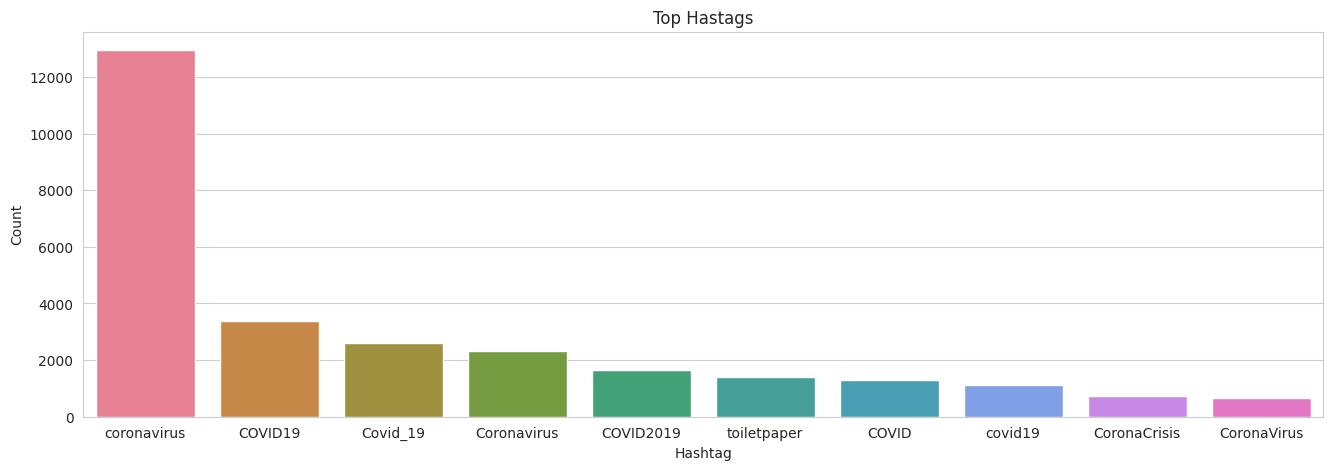

In [ ]:
a = nltk.FreqDist(Hashtags)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count' : list(a.values())})

d = d.nlargest(columns = 'Count', n = 10)

plt.figure(figsize = (16,5))
ax = sns.barplot(data =d, x = 'Hashtag', y = 'Count')
plt.title('Top Hastags')


There are some words like ‘coronavirus’, ‘toiletpaper’, having the maximum frequency in our dataset.  There are various #hashtags in the tweets column. But they are almost the same in all sentiments, people might be discussing things but they are not giving us meaningful full information.



### **Convert to LowerCase :**

In [ ]:
#For Coronavirus Tweet Sentiment Analysis we only want OriginalTweet and Sentiment Features
df2=lp[['OriginalTweet','Sentiment']]

In [ ]:
df2.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Negative


In [ ]:
df2["OriginalTweet"] = df2["OriginalTweet"].str.lower()
df2["OriginalTweet"]

0        @menyrbie @phil_gahan @chrisitv https://t.co/i...
1        advice talk to your neighbours family to excha...
2        coronavirus australia: woolworths to give elde...
3        my food stock is not the only one which is emp...
4        me, ready to go at supermarket during the #cov...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when @kameronwild...
41155    is it wrong that the smell of hand sanitizer i...
41156    @tartiicat well new/used rift s are going for ...
Name: OriginalTweet, Length: 41157, dtype: object

### **Funtion to remove punctuation**

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
df2["OriginalTweet"] = df2["OriginalTweet"].apply(remove_punctuation)

In [ ]:
df2["OriginalTweet"]

0        menyrbie philgahan chrisitv httpstcoifz9fan2pa...
1        advice talk to your neighbours family to excha...
2        coronavirus australia woolworths to give elder...
3        my food stock is not the only one which is emp...
4        me ready to go at supermarket during the covid...
                               ...                        
41152    airline pilots offering to stock supermarket s...
41153    response to complaint not provided citing covi...
41154    you know itâs getting tough when kameronwilds...
41155    is it wrong that the smell of hand sanitizer i...
41156    tartiicat well newused rift s are going for 70...
Name: OriginalTweet, Length: 41157, dtype: object

### **Removing stopwords**

In [ ]:
#Importing Stop-words
import nltk
from nltk.corpus import stopwords
stop = stopwords.words('english')

### **Function to remove stopwords**

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
df2["OriginalTweet"] = df2["OriginalTweet"].apply(stopwords)

In [ ]:
df2.head()

,OriginalTweet,Sentiment
0,menyrbie philgahan chrisitv httpstcoifz9fan2pa...,Neutral
1,advice talk neighbours family exchange phone n...,Positive
2,coronavirus australia woolworths give elderly ...,Positive
3,food stock one empty please dont panic enough ...,Positive
4,ready go supermarket covid19 outbreak im paran...,Negative


###  **Stemming operations**

In [ ]:
from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function
stemmer = SnowballStemmer("english")

In [ ]:
# create an object of stemming function

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

### Apply the function to each examples
1-Snoball Stemmer not only reduces the words to their root words, it also

2-Removes certain alphabets from the words (Lemmatization).

3-Alphabets that are removed are very common set of alphabets

4-'er', 'est',

In [ ]:
df2["OriginalTweet"] = df2["OriginalTweet"].apply(stemming)

In [ ]:
df2["OriginalTweet"]

0        menyrbi philgahan chrisitv httpstcoifz9fan2pa ...
1        advic talk neighbour famili exchang phone numb...
2        coronavirus australia woolworth give elder dis...
3        food stock one empti pleas dont panic enough f...
4        readi go supermarket covid19 outbreak im paran...
                               ...                        
41152    airlin pilot offer stock supermarket shelv nz ...
41153    respons complaint provid cite covid19 relat de...
41154    know itâ get tough kameronwild ration toilet ...
41155    wrong smell hand sanit start turn coronavirus ...
41156    tartiicat well newus rift go 70000 amazon rn a...
Name: OriginalTweet, Length: 41157, dtype: object

### Check for overall tweets

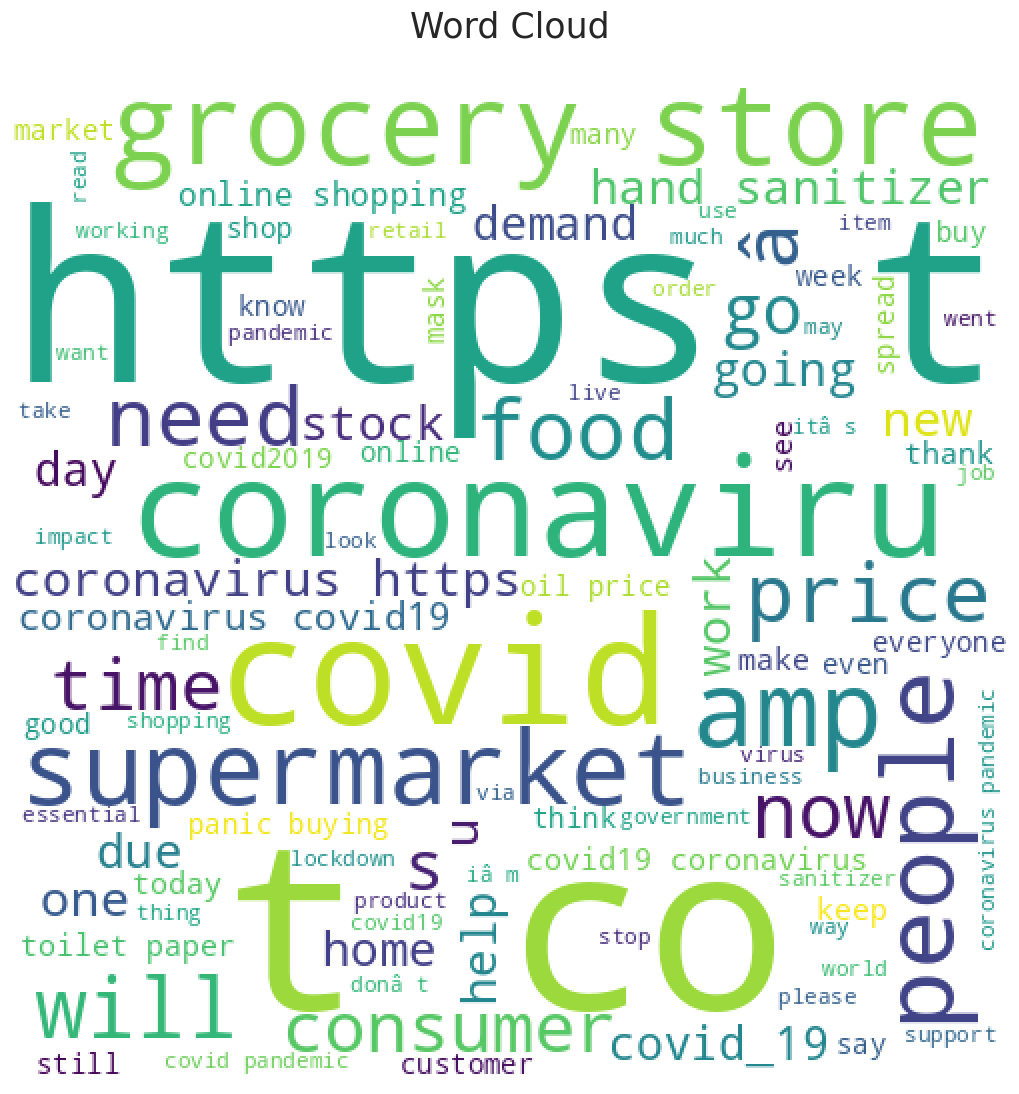

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df1.OriginalTweet:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud\n',fontsize=25)
plt.show()

###Word Cloud for positive sentiments

In [ ]:
df_positive=df2[df2['Sentiment']=='Positive']

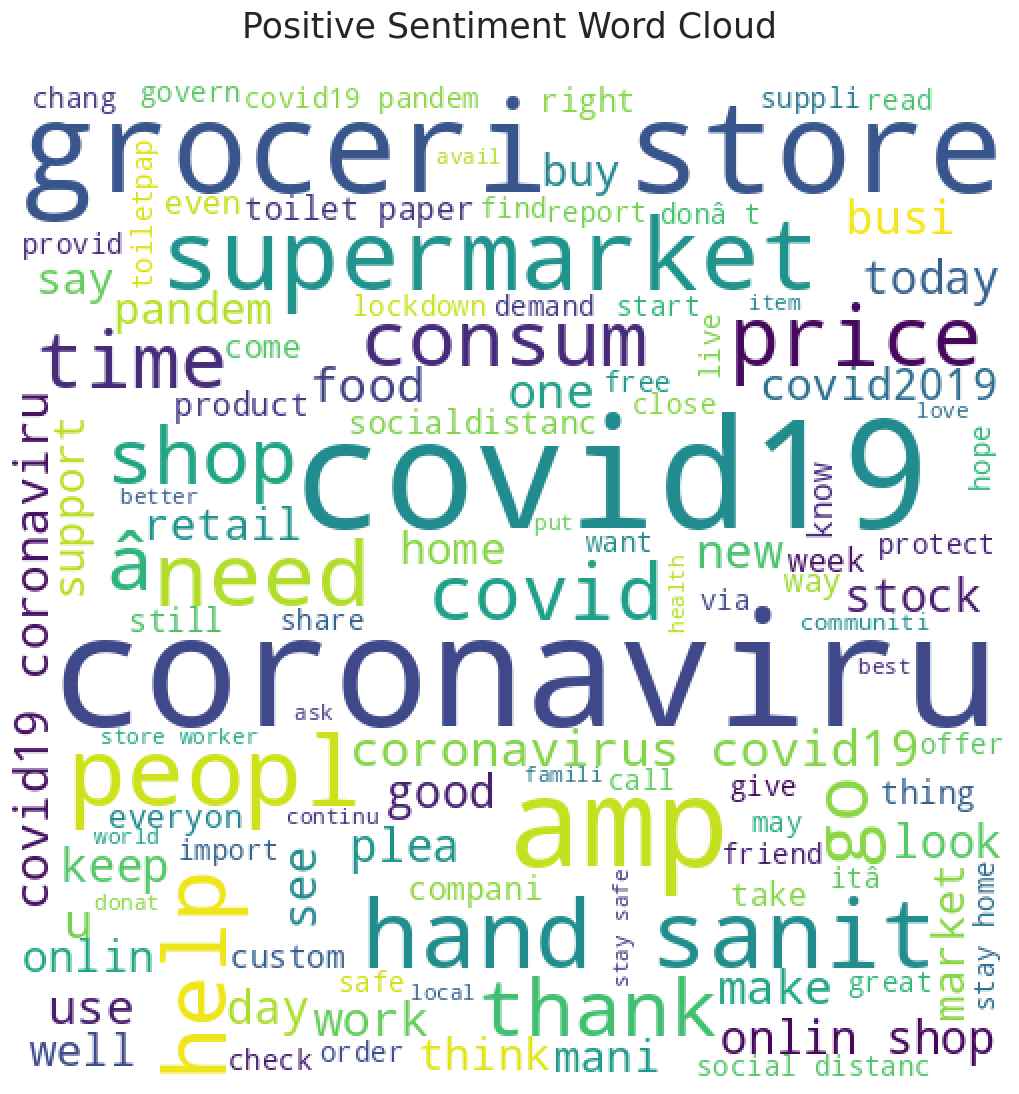

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_positive.OriginalTweet:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 500, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Positive Sentiment Word Cloud\n',fontsize=25)
plt.show()

### Word count for negative sentiment

In [ ]:
df_negative = df2[df2['Sentiment']=='Negative']

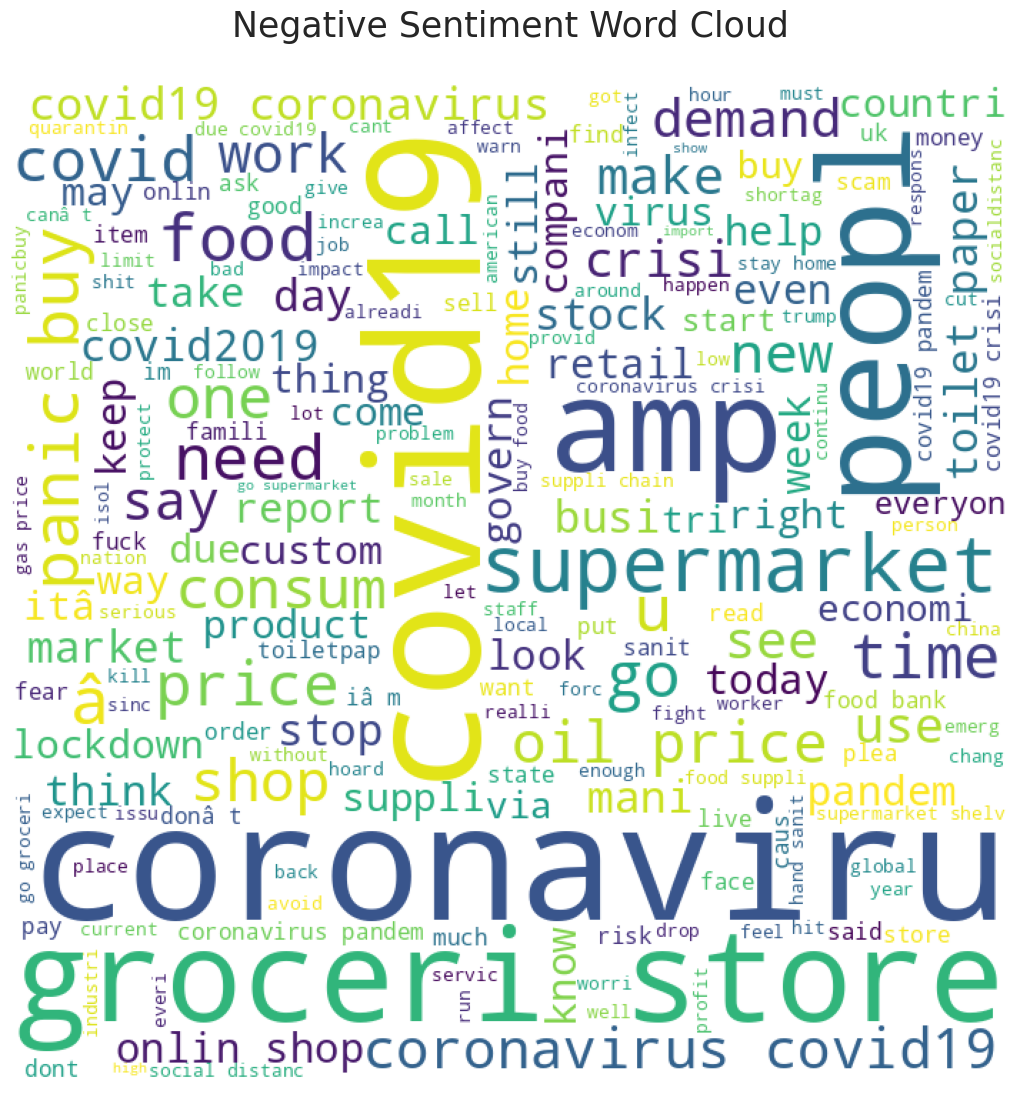

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_negative.OriginalTweet:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Negative Sentiment Word Cloud\n',fontsize=25)
plt.show()

### Word Cloud for Neutral sentiments

In [ ]:
df_neutral = df2[df2['Sentiment']=='Neutral']

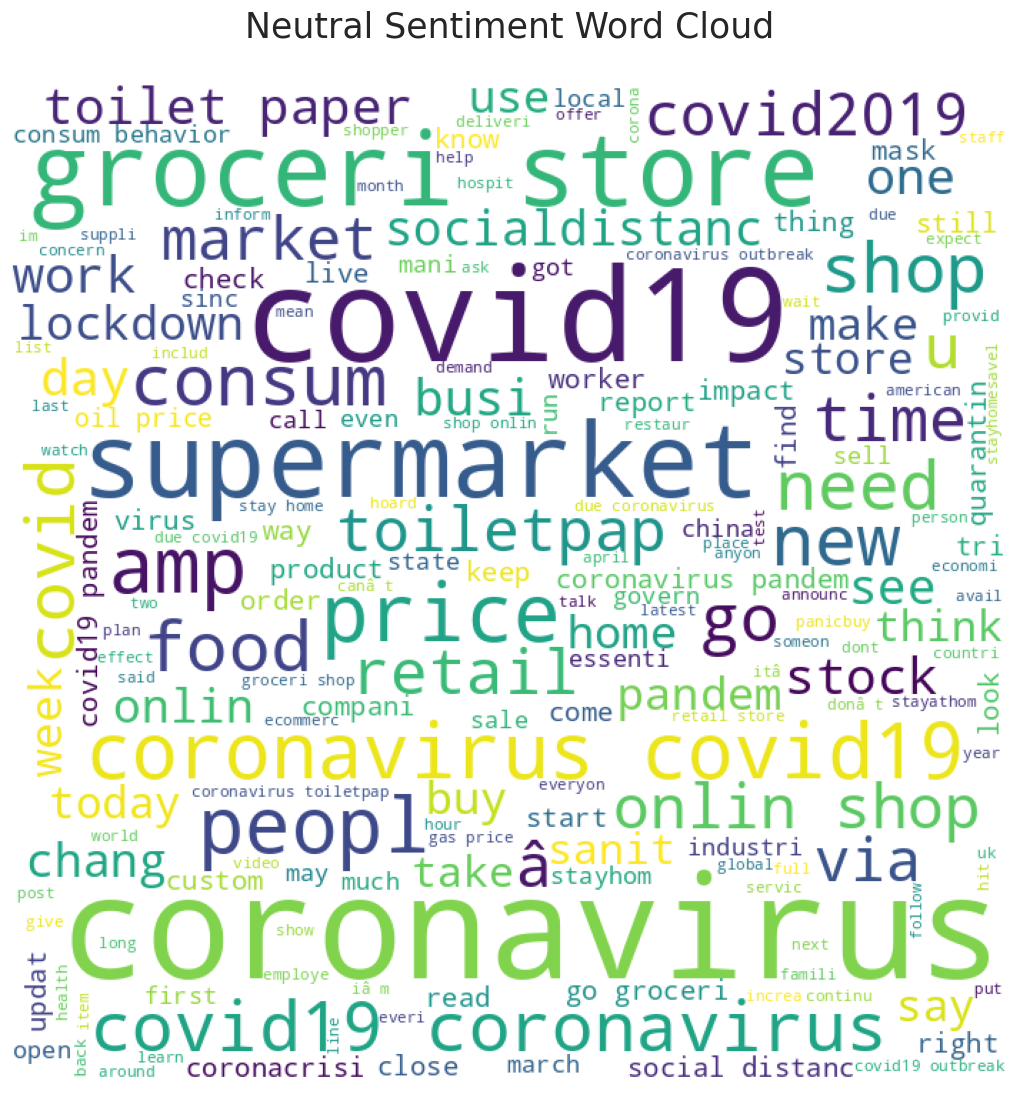

In [ ]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df_neutral.OriginalTweet:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Neutral Sentiment Word Cloud\n',fontsize=25)
plt.show()

In [ ]:
correlation=df1.corr()
print(correlation)

             UserName  ScreenName  text_length
UserName     1.000000    1.000000    -0.034932
ScreenName   1.000000    1.000000    -0.034932
text_length -0.034932   -0.034932     1.000000


<Axes: >

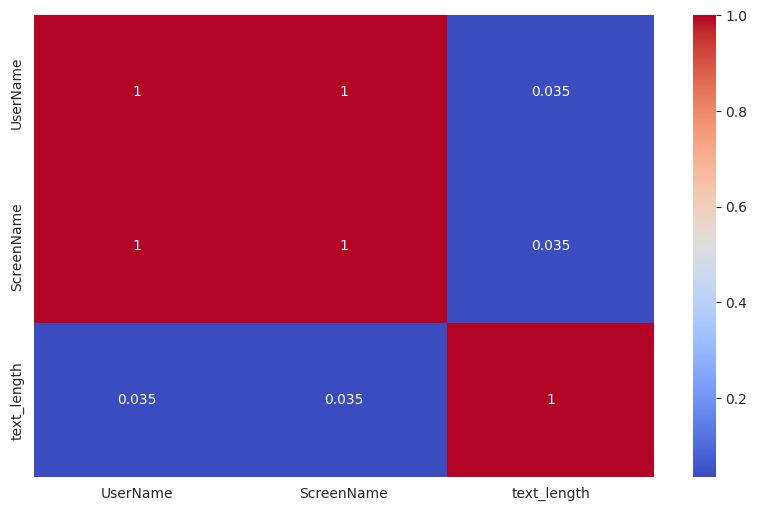

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(10,6))
sns.heatmap(abs(correlation), annot= True, cmap='coolwarm')

# Feature Engineering

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation
df1.isnull().sum().sort_values(ascending=False)

Location         8590
UserName            0
ScreenName          0
TweetAt             0
OriginalTweet       0
Sentiment           0
text_length         0
dtype: int64

Here we can find that 'Location' column having null values 8590 and we generally not take 'Location' column as  machine learning model as Sentiment analysis.

<Axes: >

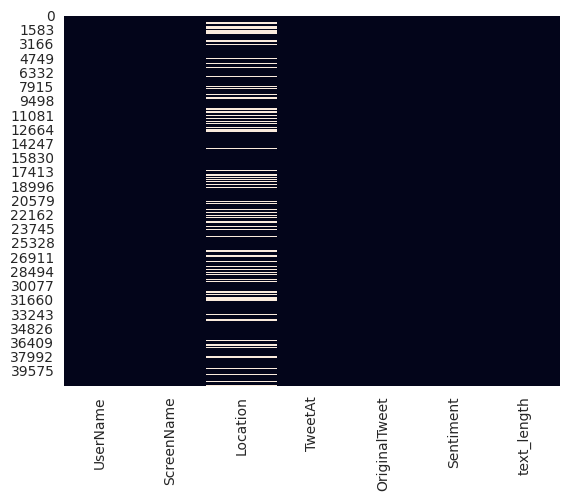

In [ ]:
# Handling Missing Values & Missing Value Imputation
sns.heatmap(df1.isnull(),cbar=False)

###  Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
print(df2[['OriginalTweet', 'Sentiment']].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   OriginalTweet  41157 non-null  object
 1   Sentiment      41157 non-null  object
dtypes: object(2)
memory usage: 643.2+ KB
None


We do not treated/handled  the outliers because we did not take any column having continuous data (numerical data) as Dependent/Independent column during the model training.


In [ ]:
# Handling Outliers & Outlier treatments
freq = df1['Sentiment'].value_counts().reset_index().rename(columns = {'index':'Sentiment','Sentiment':'Counts'})
freq

,Sentiment,Counts
0,Positive,11422
1,Negative,9917
2,Neutral,7713
3,Extremely Positive,6624
4,Extremely Negative,5481


# Preprocessing

In [ ]:
#Defining the dependent and independent variables
X = df2['OriginalTweet']
y = df2['Sentiment']

In [ ]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

### Data Scaling

Here no need of any scaling of Dataset becuase here only check sentiment of people,hence we analyze only  User sentiment  tweet according to the secenario of Covid-19.

### Handling Imbalanced Dataset

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
 6   text_length    41157 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 2.2+ MB


Now , here we decided that We used only two column for machine learning modelling i.e 'Original Tweet' & 'Sentiment' and in both column eqaul no of rows


### TF-IDF VECTORIZATION(Term Frequency-Inverse Document Frequency)

We used TF-IDF method as classic approach of converting input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support
TF-IDF is calculated as the product of two values: term frequency (TF) and Inverse document frequency (IDF).
The term frequency (TF) measures how frequently a term appears in a document.
The inverse document frequency (IDF) measures how important a term is in the entire corpus, by penalizing the terms that appear in many documents.


In [ ]:
#vectorization
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer


# Creating an object of TfidfVectorizer
tf_idf = TfidfVectorizer()

x_train = tf_idf.fit_transform(X_train.values)
x_test = tf_idf.transform(X_test.values)

y_train = y_train.values
y_test = y_test.values

In [ ]:
#shape of split data
print("X_train.shape : ", x_train.shape)
print("X_test.shape : ", x_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (32925, 63453)
X_test.shape :  (8232, 63453)
y_train.shape :  (32925,)
y_test.shape :  (8232,)


# Model Implementation

In [ ]:
# List of models that we are going to use for this dataset
model=[
    ["LOGISTIC REGRESSION: ",LogisticRegression()],
    ["DECISIONTREE CLASSIFIER : ",DecisionTreeClassifier()],
    ["SVM CLASSIFIER: ",SVC()],
    ["NAVIES BAYES : ",MultinomialNB()],
    ["RANDOM FOREST CLASSIFIER : ",RandomForestClassifier(n_estimators=100, random_state=42)],
]

In [ ]:
import time
# Run all the proposed models and update the information in a list model_data
model_list=[]
for name,fit_model in model:
  fit_model_list={}
  fit_model_list["Name"]=name
  start = time.time()
  end = time.time()
  fit_model.fit(x_train,y_train)
  fit_model_list["Train_Time"] = end - start
  fit_model_list["Accuracy"]=accuracy_score(y_test,fit_model.predict(x_test))
  fit_model_list["Precision"]=precision_score(y_test,fit_model.predict(x_test), average='weighted')
  fit_model_list["Recall"]=recall_score(y_test,fit_model.predict(x_test), average='weighted')
  fit_model_list["F1 score"]=f1_score(y_test,fit_model.predict(x_test),average='weighted')
  model_list.append(fit_model_list)

In [ ]:
model_list

[{'Name': 'LOGISTIC REGRESSION: ',
  'Train_Time': 7.152557373046875e-07,
  'Accuracy': 0.7872934888241011,
  'Precision': 0.7859914620071722,
  'Recall': 0.7872934888241011,
  'F1 score': 0.7830833192867166},
 {'Name': 'DECISIONTREE CLASSIFIER : ',
  'Train_Time': 9.5367431640625e-07,
  'Accuracy': 0.6386054421768708,
  'Precision': 0.6444118173788179,
  'Recall': 0.6386054421768708,
  'F1 score': 0.6404230388988155},
 {'Name': 'SVM CLASSIFIER: ',
  'Train_Time': 4.76837158203125e-07,
  'Accuracy': 0.7809766763848397,
  'Precision': 0.7789502821568225,
  'Recall': 0.7809766763848397,
  'F1 score': 0.7768257365926046},
 {'Name': 'NAVIES BAYES : ',
  'Train_Time': 9.5367431640625e-07,
  'Accuracy': 0.6331389698736638,
  'Precision': 0.6923375378315241,
  'Recall': 0.6331389698736638,
  'F1 score': 0.5665468780660693},
 {'Name': 'RANDOM FOREST CLASSIFIER : ',
  'Train_Time': 1.1920928955078125e-06,
  'Accuracy': 0.7397959183673469,
  'Precision': 0.7396617788104844,
  'Recall': 0.7397959

In [ ]:
# Convert list to dataframe
dataframe=pd.DataFrame(model_list)

In [ ]:
model_dataframe=dataframe.sort_values(by="F1 score",ascending=False)

In [ ]:
model_dataframe

,Name,Train_Time,Accuracy,Precision,Recall,F1 score
0,LOGISTIC REGRESSION:,7.152557e-07,0.787293,0.785991,0.787293,0.783083
2,SVM CLASSIFIER:,4.768372e-07,0.780977,0.778950,0.780977,0.776826
4,RANDOM FOREST CLASSIFIER :,1.192093e-06,0.739796,0.739662,0.739796,0.738312
1,DECISIONTREE CLASSIFIER :,9.536743e-07,0.638605,0.644412,0.638605,0.640423
3,NAVIES BAYES :,9.536743e-07,0.633139,0.692338,0.633139,0.566547


<Axes: title={'center': 'Results'}, xlabel='Name'>

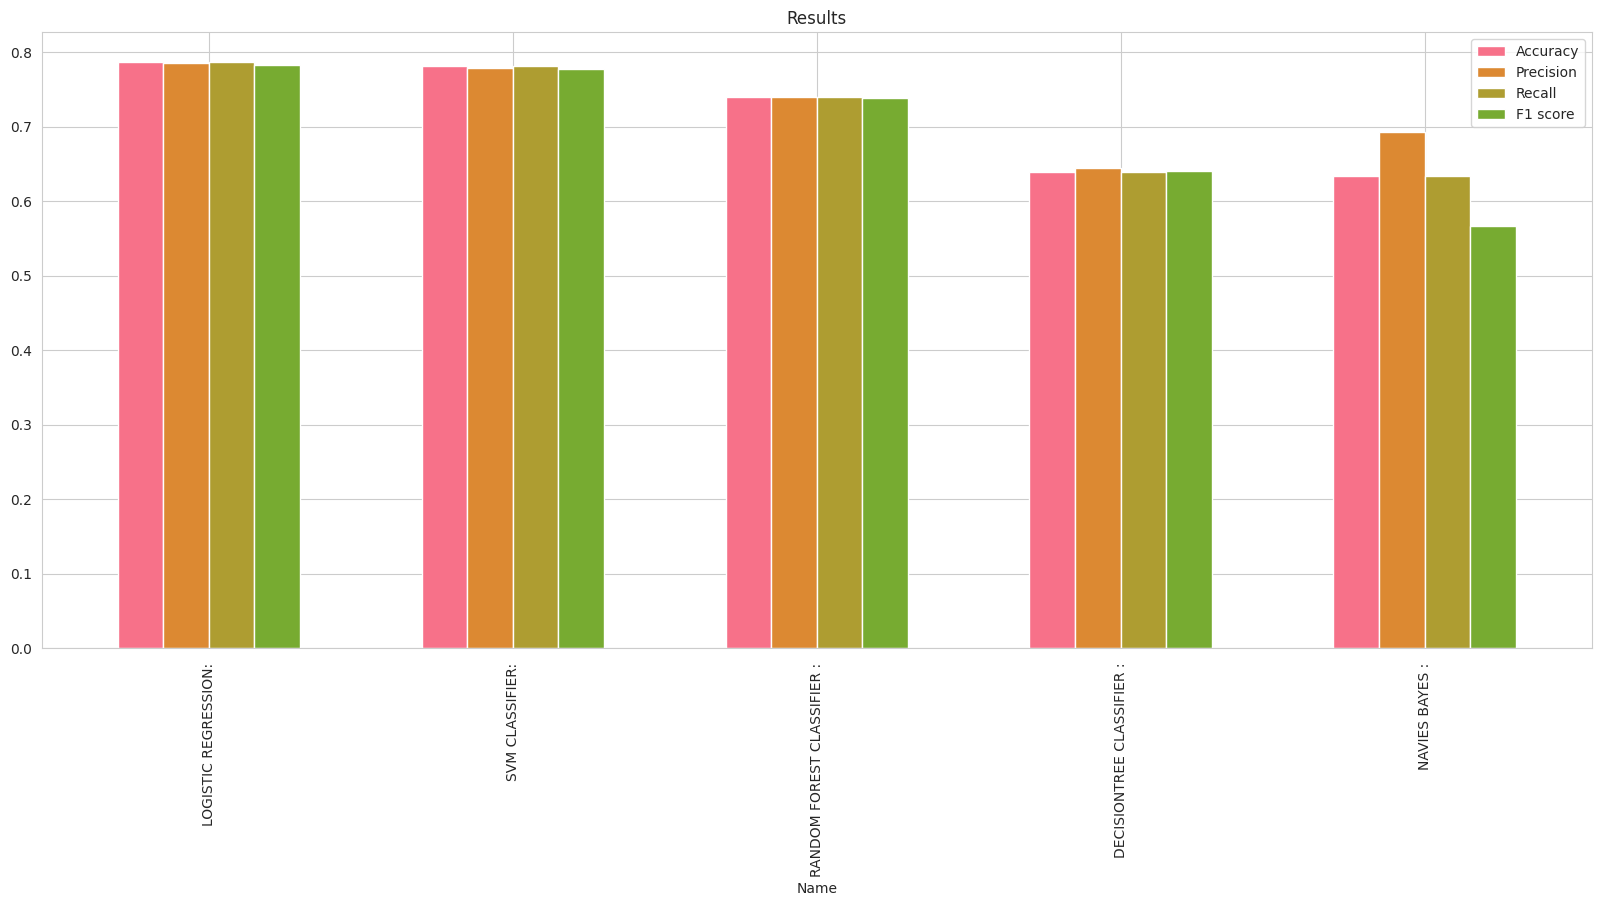

In [ ]:
model_dataframe.plot.bar(x="Name", y=['Accuracy' , 'Precision' , 'Recall','F1 score'], title = 'Results' , width = .6, figsize= (20,8))

### Observation:-
We can conclude that Logistic regression is the best model for our dataset, followed closely by SVM classifier and Random Forest classifier.
DECISIONTREE CLASSIFIER and NAVIES BAYES did not give a good result compared to others.

##### Which hyperparameter optimization technique have you used and why?

GridSearchCV uses each and every combination to build and evaluate the model performance.Since the dependent variable has only 3 unique values its better to use GridSeachCV.

## Cross- Validation & Hyperparameter Tuning

In [ ]:
#empty data frame creation
i=0
error_df=pd.DataFrame()

## Logistic regression

In [ ]:
#hyperparameter tuning
logr = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

In [ ]:
#fitting data
logreg=GridSearchCV(logr,parameters,cv=3)
logreg.fit(x_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']})

In [ ]:
logreg.best_params_

{'C': 10, 'penalty': 'l2'}

In [ ]:
logreg.best_estimator_

LogisticRegression(C=10)

In [ ]:
#prediction
y_pred = logreg.predict(x_test)

In [ ]:
#evaluation metrics

#F1 score
f1score = f1_score(y_test,y_pred,average='weighted')

#Accuracy
acc = accuracy_score(y_test,y_pred)

#precision
prec = precision_score(y_test,y_pred, average='weighted')

#recall
recall=recall_score(y_test,y_pred, average='weighted')

print('Accuracy :' ,acc)
print('Precision :', prec)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.7870505344995141
Precision : 0.7847892659528796
Recall : 0.7870505344995141
F1 score : 0.7851189055836815


In [ ]:
#Inserting errors in dataframe

error_df.loc[i,"Model_Name"]='LOGISTIC REGRESSION'
error_df.loc[i,"Accuracy"]=round(acc,4)
error_df.loc[i,"Precision"]=round(prec,4)
error_df.loc[i,"Recall"]=round(recall,4)
error_df.loc[i,"F1 score"]=round(f1score,4)


i+=1

## KNN

In [ ]:
#hyperparameter tuning
reg = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}

In [ ]:
#fitting data
knn = GridSearchCV(estimator=reg,param_grid=param)
knn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]})

In [ ]:
knn.best_params_

{'n_neighbors': 8}

In [ ]:
knn.best_estimator_

KNeighborsClassifier(n_neighbors=8)

In [ ]:
#prediction
y_pred = knn.predict(x_test)

In [ ]:
#evaluation metrics

#F1 score
f1score = f1_score(y_test,y_pred,average='weighted')

#Accuracy
acc = accuracy_score(y_test,y_pred)

#precision
prec = precision_score(y_test,y_pred, average='weighted')

#recall
recall=recall_score(y_test,y_pred, average='weighted')

print('Accuracy :' ,acc)
print('Precision :', prec)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.5668124392614189
Precision : 0.5740478551411986
Recall : 0.5668124392614189
F1 score : 0.5689345657087808


In [ ]:
#Inserting errors in dataframe

error_df.loc[i,"Model_Name"]='KNN CLASSIFIER'
error_df.loc[i,"Accuracy"]=round(acc,4)
error_df.loc[i,"Precision"]=round(prec,4)
error_df.loc[i,"Recall"]=round(recall,4)
error_df.loc[i,"F1 score"]=round(f1score,4)


i+=1

## Naive bayes


In [ ]:
#hyperparameter tuning
multinomial_naive_bayes = MultinomialNB()
hyperparameters = {
    'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],}
naive_bayes_gs = GridSearchCV(multinomial_naive_bayes, hyperparameters, cv=5)

In [ ]:
#fitting data
naive_bayes_gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0]})

In [ ]:
naive_bayes_gs.best_params_

{'alpha': 0.1}

In [ ]:
naive_bayes_gs.best_estimator_

MultinomialNB(alpha=0.1)

In [ ]:
#prediction
y_pred = naive_bayes_gs.predict(x_test)

In [ ]:
#evaluation metrics

#F1 score
f1score = f1_score(y_test,y_pred,average='weighted')

#Accuracy
acc = accuracy_score(y_test,y_pred)

#precision
prec = precision_score(y_test,y_pred, average='weighted')

#recall
recall=recall_score(y_test,y_pred, average='weighted')

print('Accuracy :' ,acc)
print('Precision :', prec)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.6449222546161322
Precision : 0.6580395872364503
Recall : 0.6449222546161322
F1 score : 0.6095386236847311


In [ ]:
#Inserting errors in dataframe

error_df.loc[i,"Model_Name"]='NAVIES BAYES'
error_df.loc[i,"Accuracy"]=round(acc,4)
error_df.loc[i,"Precision"]=round(prec,4)
error_df.loc[i,"Recall"]=round(recall,4)
error_df.loc[i,"F1 score"]=round(f1score,4)


i+=1

## RANDOM FOREST CLASSIFIER

In [ ]:
#hyperparameter tuning
classifier = RandomForestClassifier()
parameters = {'n_estimators':[100, 200, 300], 'max_depth':[5, 10, 15],'max_features': ['sqrt', 'log2']}
rf = GridSearchCV(classifier, param_grid = parameters, cv=5,n_jobs=-1)

In [ ]:
#fitting data
rf.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [ ]:
rf.best_params_

{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100}

In [ ]:
rf.best_estimator_

RandomForestClassifier(max_depth=15)

In [ ]:
#prediction
y_pred = rf.predict(x_test)

In [ ]:
#evaluation metrics

#F1 score
f1score = f1_score(y_test,y_pred,average='weighted')

#Accuracy
acc = accuracy_score(y_test,y_pred)

#precision
prec = precision_score(y_test,y_pred, average='weighted')

#recall
recall=recall_score(y_test,y_pred, average='weighted')

print('Accuracy :' ,acc)
print('Precision :', prec)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.5232021379980564
Precision : 0.548053408159038
Recall : 0.5232021379980564
F1 score : 0.4263237553844643


In [ ]:
#Inserting errors in dataframe

error_df.loc[i,"Model_Name"]='RANDOM FOREST CLASSIFIER'
error_df.loc[i,"Accuracy"]=round(acc,4)
error_df.loc[i,"Precision"]=round(prec,4)
error_df.loc[i,"Recall"]=round(recall,4)
error_df.loc[i,"F1 score"]=round(f1score,4)


i+=1

## Models DataFreame of Cross- Validation & Hyperparameter Tuning

In [ ]:
#sorting by F1 score
error_df.sort_values(by=['F1 score'],ascending=False,inplace=True)
error_df=error_df.reset_index()
error_df.drop(labels='index',axis=1)

,Model_Name,Accuracy,Precision,Recall,F1 score
0,LOGISTIC REGRESSION,0.7871,0.7848,0.7871,0.7851
1,NAVIES BAYES,0.6449,0.6580,0.6449,0.6095
2,KNN CLASSIFIER,0.5668,0.5740,0.5668,0.5689
3,RANDOM FOREST CLASSIFIER,0.5232,0.5481,0.5232,0.4263


<Axes: title={'center': 'Results'}, xlabel='Model_Name'>

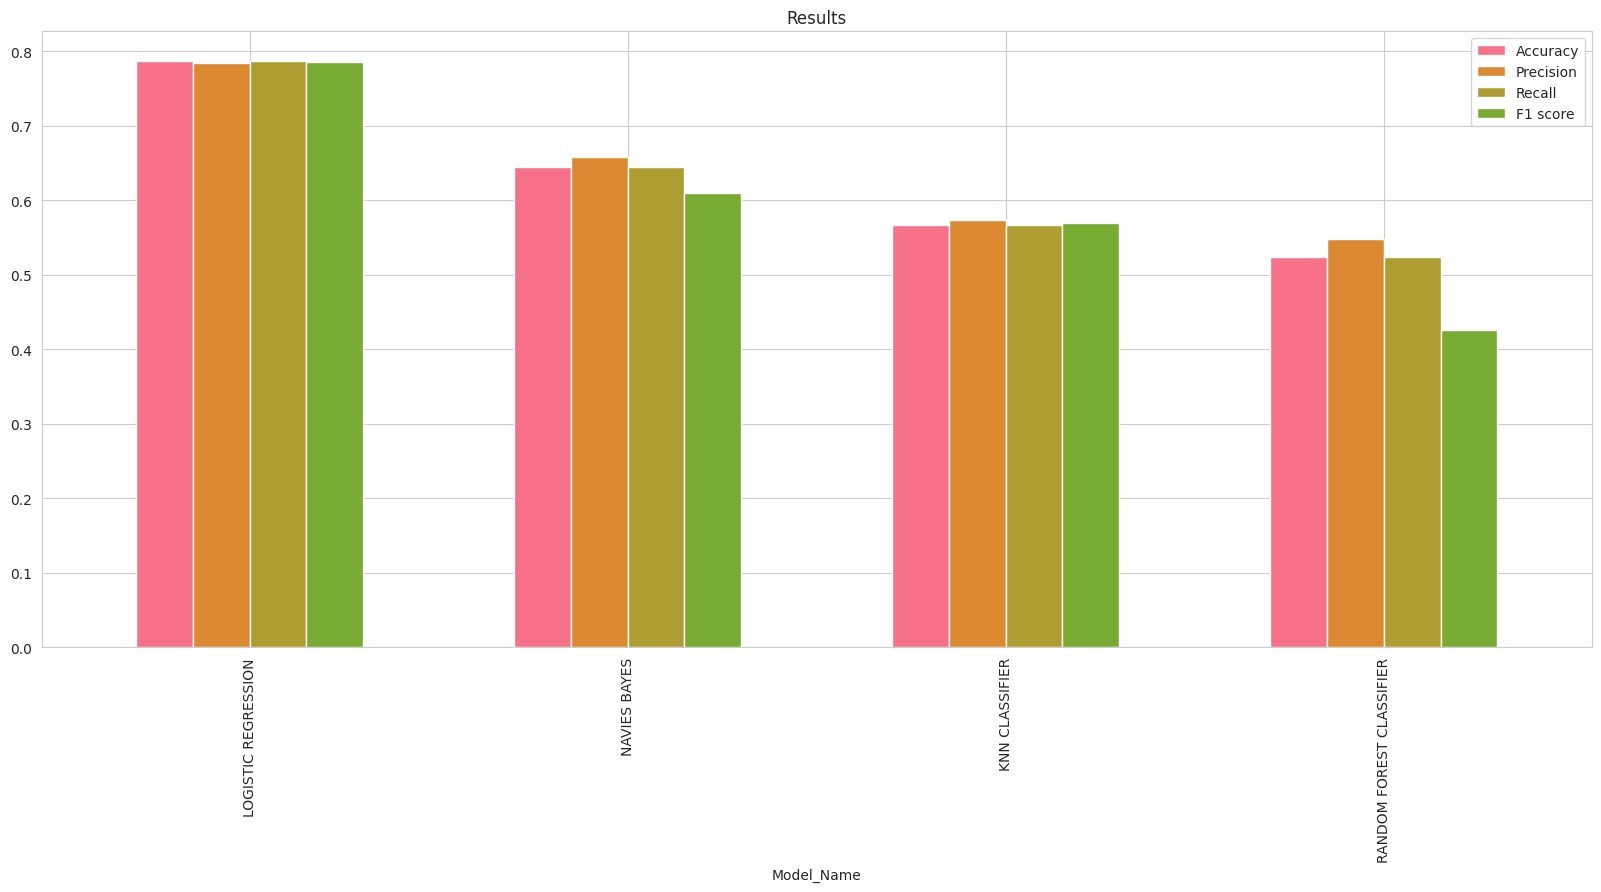

In [ ]:
error_df.plot.bar(x="Model_Name", y=['Accuracy' , 'Precision' , 'Recall','F1 score'], title = 'Results' , width = .6, figsize= (20,8))

### Observation:-
We can conclude that Logistic regression is the best model for our dataset, followed closely by NAVIES BAYES .
KNN Classifier and Random Forest classifier did not give a good result compared to others.

# Conclusion


*   The majority of the tweets were around 250 characters long, indicating that there was lots of interest about COvid-19 amoung the public
*  More positive tweets than neutral or negative ones tweeted globally
*  People tweeted more in March than in April since many nations imposed lockdown.
*  The United States and England were two countires with maximum tweets.
*  We saw inconsistent responses from Australia during pandemic with equal number of positive and negative tweets.
*  Logistic regression algorithm gave the moset accurate model fit.

